In [1]:
!pip install cirq numpy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [6]:
import pandas as pd

# Veri setini yükleme
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
# Temel bilgileri görüntüleme
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

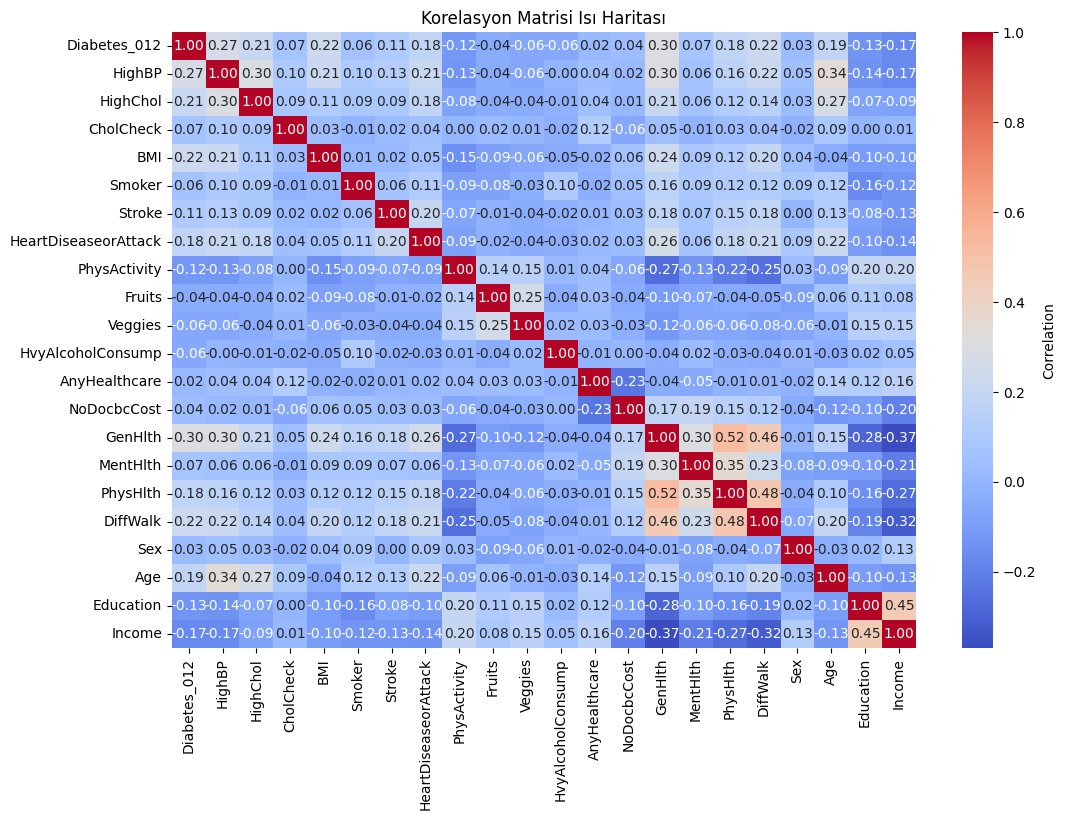

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplama
correlation_matrix = df.corr()

# Korelasyon matrisi ısı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()


Seçilen öznitelikler ve önem dereceleri:
GenHlth                 0.105339
BMI                     0.095075
HighBP                  0.076835
HighChol                0.059194
Age                     0.048782
HeartDiseaseorAttack    0.038695
DiffWalk                0.032859
Income                  0.028295
HvyAlcoholConsump       0.023340
CholCheck               0.017547
Sex                     0.016432
Stroke                  0.013787
Education               0.007626
MentHlth                0.007271
AnyHealthcare           0.005957
Smoker                  0.005752
PhysActivity            0.005680
Veggies                 0.002374
NoDocbcCost             0.001874
Fruits                  0.001341
dtype: float64


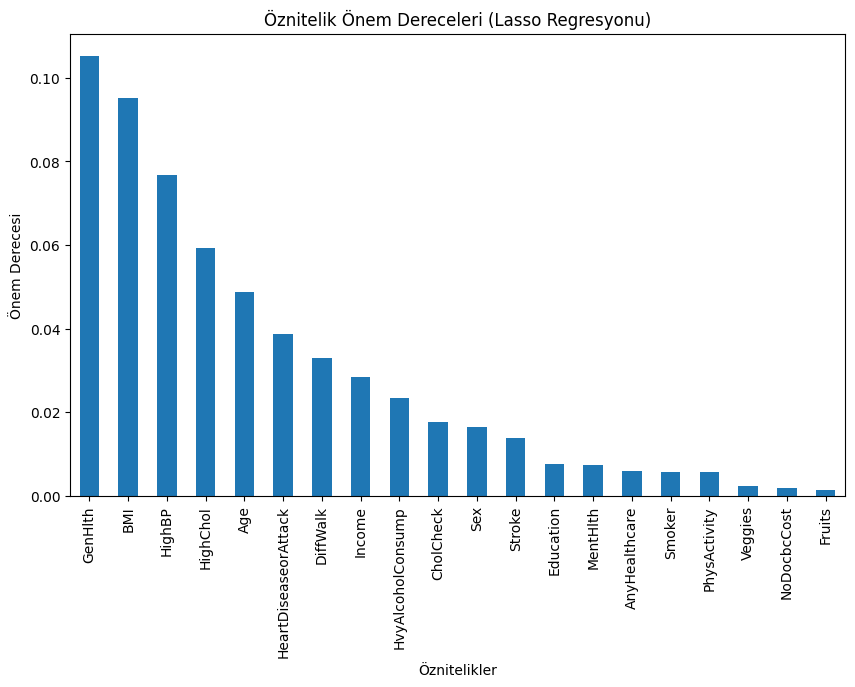

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Lasso regresyonunu uygulama
lasso = LassoCV(cv=5).fit(X_scaled, y)

# Önemli öznitelikleri ve önem derecelerini belirleme
importance = pd.Series(np.abs(lasso.coef_), index=X.columns)
importance = importance[importance != 0].sort_values(ascending=False)

# Seçilen özniteliklerin isimlerini ve önem derecelerini yazdırma
print("Seçilen öznitelikler ve önem dereceleri:")
print(importance)

# Özniteliklerin görselleştirilmesi
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Öznitelik Önem Dereceleri (Lasso Regresyonu)')
plt.xlabel('Öznitelikler')
plt.ylabel('Önem Derecesi')
plt.show()


In [25]:
# Eşik değerine göre öznitelik seçimi
threshold = 0.04
selected_features = importance[importance >= threshold].index

# Seçilen özniteliklerle yeni bir DataFrame oluşturma
selected_df = df[selected_features]

# Seçilen özniteliklerin isimlerini listeleme
selected_features_list = list(selected_features)
print(f"Seçilen öznitelikler ({len(selected_features_list)}):", selected_features_list)


Seçilen öznitelikler (5): ['GenHlth', 'BMI', 'HighBP', 'HighChol', 'Age']
Seçilen öznitelikler ve veriler selected_features_diabetes_dataset.xlsx dosyasına kaydedildi.


In [26]:
# Hedef sütunun adını belirleme (örneğin, 'Outcome' olarak adlandırılmış olabilir)
target = 'Diabetes_012'

# Seçilen özniteliklerle yeni bir DataFrame oluşturma ve hedef sütununu ekleme
selected_df = df[selected_features]
selected_df[target] = df[target]

# Excel dosyasına kaydetme
output_file = 'selected_features_diabetes_dataset.xlsx'
selected_df.to_excel(output_file, index=False)

print(f"Seçilen öznitelikler ve veriler {output_file} dosyasına kaydedildi.")


<ipython-input-26-22c06a3a8583>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df[target] = df[target]


Seçilen öznitelikler ve veriler selected_features_diabetes_dataset.xlsx dosyasına kaydedildi.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Veri setini yükleme
df = pd.read_excel('selected_features_diabetes_dataset.xlsx')

# Hedef değişkeni belirleme
target = 'Diabetes_012'

# Veri ve hedef değişkeni ayırma
X = df.drop(columns=[target])
y = df[target]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verileri standartlaştırma (Bazı modeller için önemli)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Sınıflandırma modellerinin listesi
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Lojistik Regresyon': LogisticRegression(),
    'Karar Ağacı': DecisionTreeClassifier(),
    'Rastgele Orman': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    # 'SVM': SVC()
}

# Modellerin doğruluk sonuçlarını saklamak için bir sözlük
accuracy_results = {}

# Modelleri eğitme ve doğruluk sonuçlarını hesaplama
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")


K-Nearest Neighbors: 0.8321
Naive Bayes: 0.8248
Lojistik Regresyon: 0.8471
Karar Ağacı: 0.8450
Rastgele Orman: 0.8448
Gradient Boosting: 0.8485


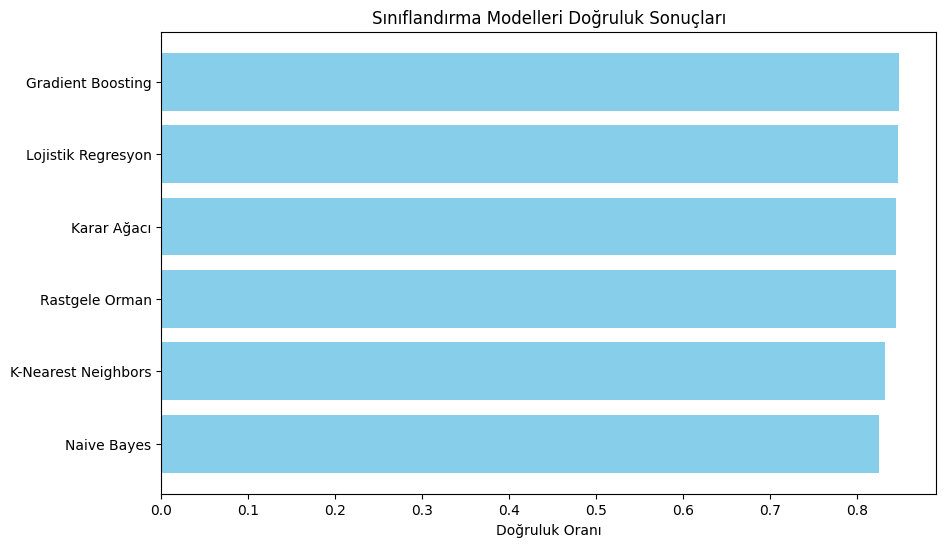

In [3]:
import matplotlib.pyplot as plt

# Doğruluk sonuçlarını sıralama
sorted_accuracy = sorted(accuracy_results.items(), key=lambda x: x[1], reverse=True)

# Çubuk grafik ile görselleştirme
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_accuracy], [x[1] for x in sorted_accuracy], color='skyblue')
plt.xlabel('Doğruluk Oranı')
plt.title('Sınıflandırma Modelleri Doğruluk Sonuçları')
plt.gca().invert_yaxis()
plt.show()


In [4]:
from sklearn.metrics import classification_report

# Sınıflandırma modellerinin listesi
models = {
    'Lojistik Regresyon': LogisticRegression(),
    'Karar Ağacı': DecisionTreeClassifier(),
    'Rastgele Orman': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    # 'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Modellerin sınıflandırma raporlarını saklamak için bir sözlük
classification_reports = {}

# Modelleri eğitme ve sınıflandırma raporlarını hesaplama
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report
    print(f"{name} Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Lojistik Regresyon Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     64180
           1       0.00      0.00      0.00      1425
           2       0.53      0.16      0.24     10499

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104

Karar Ağacı Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91     64180
           1       0.04      0.00      0.00      1425
           2       0.50      0.16      0.24     10499

    accuracy                           0.84     76104
   macro avg       0.47      0.38      0.39     76104
weighted avg       0.80      0.84      0.80     76104

Rastgele Orman Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     64180
           1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Gradient Boosting Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     64180
           1       0.00      0.00      0.00      1425
           2       0.54      0.17      0.26     10499

    accuracy                           0.85     76104
   macro avg       0.47      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104

K-Nearest Neighbors Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     64180
           1       0.04      0.00      0.01      1425
           2       0.41      0.22      0.28     10499

    accuracy                           0.83     76104
   macro avg       0.44      0.39      0.40     76104
weighted avg       0.79      0.83      0.80     76104

Naive Bayes Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     64180
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

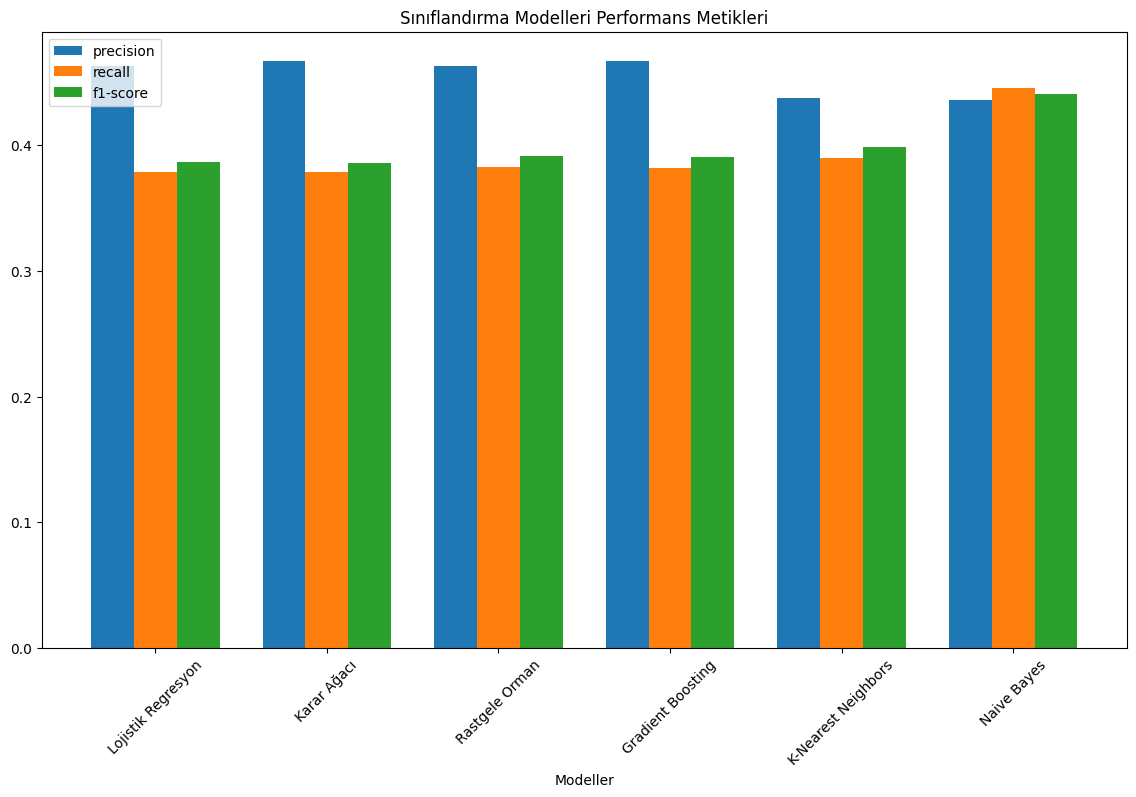

In [5]:
import numpy as np

# Modeller ve metrikler
metrics = ['precision', 'recall', 'f1-score']
model_names = list(classification_reports.keys())
num_models = len(model_names)
num_metrics = len(metrics)

# Her bir metrik için sonuçları toplama
metric_values = {metric: [] for metric in metrics}
for model_name, report in classification_reports.items():
    for metric in metrics:
        # Her bir model için ortalama (macro avg) değerlerini kullanma
        metric_values[metric].append(report['macro avg'][metric])

# Çubuk grafik ile görselleştirme
x = np.arange(num_models)
width = 0.25  # Çubukların genişliği

fig, ax = plt.subplots(figsize=(14, 8))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, metric_values[metric], width, label=metric)

ax.set_xlabel('Modeller')
ax.set_title('Sınıflandırma Modelleri Performans Metikleri')
ax.set_xticks(x + width)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.show()


**QML**

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Veri setini yükleme
df = pd.read_excel('selected_features_diabetes_dataset.xlsx')

# Hedef değişkeni belirleme
target = 'Diabetes_012'

# Veri ve hedef değişkeni ayırma
X = df.drop(columns=[target])
y = df[target]

# Verilerin normalleştirilmesi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Öznitelik sayısını sınırlama (örneğin, ilk 4 öznitelik)
X_selected = X_scaled[:, :4]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [10]:
import cirq
import sympy
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from scipy.optimize import minimize

# Kuantum bitleri (qubits) tanımlama
qubits = [cirq.GridQubit(0, i) for i in range(X_selected.shape[1])]

# Parametreli devre tanımlama
def create_circuit(params):
    circuit = cirq.Circuit()
    for i, qubit in enumerate(qubits):
        circuit.append(cirq.ry(params[i])(qubit))
    circuit.append(cirq.CZ(qubits[0], qubits[1]))
    return circuit

# Devreyi çalıştırma ve sonuçları alma
def run_circuit(circuit):
    result = simulator.simulate(circuit)
    return np.argmax(result.final_state_vector.real)

# Performans değerlendirmesi için yardımcı fonksiyon
def evaluate(params):
    y_pred_train = [run_circuit(create_circuit(params)) for x in X_train]
    y_pred_test = [run_circuit(create_circuit(params)) for x in X_test]
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    return 1 - accuracy_test  # minimize fonksiyonu için negatif doğruluk

# Simülatör oluşturma
simulator = cirq.Simulator()

# Parametreler
params = sympy.symbols(f'theta_0:{X_selected.shape[1]}')

# Parametre optimizasyonu
initial_params = np.zeros(len(params))
result = minimize(evaluate, initial_params, method='COBYLA')

# En iyi parametrelerle sonuçları değerlendirme
best_params = result.x
y_pred_train = [run_circuit(create_circuit(best_params)) for x in X_train]
y_pred_test = [run_circuit(create_circuit(best_params)) for x in X_test]

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"En iyi Eğitim Doğruluğu: {accuracy_train}")
print(f"En iyi Test Doğruluğu: {accuracy_test}")


En iyi Eğitim Doğruluğu: 0.8420225706176511
En iyi Test Doğruluğu: 0.8433196678229791


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Seçilen öznitelikler ile verileri ayırma - Seçilenlerden kasıt tüm veri setinin sonuçlarıydı
X_selected = df[selected_features]
y = df[target]

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Lojistik Regresyon
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Lojistik Regresyon Sonuçları")
print(classification_report(y_test, y_pred))

# Rastgele Orman
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Rastgele Orman Sonuçları")
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Lojistik Regresyon Sonuçları
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     64180
         1.0       0.00      0.00      0.00      1425
         2.0       0.49      0.16      0.24     10499

    accuracy                           0.84     76104
   macro avg       0.45      0.38      0.39     76104
weighted avg       0.79      0.84      0.80     76104

Rastgele Orman Sonuçları
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     64180
         1.0       0.00      0.00      0.00      1425
         2.0       0.46      0.21      0.29     10499

    accuracy                           0.84     76104
   macro avg       0.44      0.39      0.40     76104
weighted avg       0.79      0.84      0.81     76104

